# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Luci McDaniel
### GitHub:https://github.com/LuciMcD/web-scrapingMod6.git 

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [199]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package            Version
------------------ -----------
annotated-types    0.6.0
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               0.7.11
catalogue          2.0.10
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
cloudpathlib       0.16.0
colorama           0.4.6
comm               0.2.2
confection         0.1.4
contourpy          1.2.1
cycler             0.12.1
cymem              2.0.8
debugpy            1.8.1
decorator          5.1.1
en-core-web-sm     3.7.1
executing          2.0.1
fonttools          4.51.0
idna               3.7
ipykernel          6.29.4
ipython            8.23.0
jedi               0.19.1
Jinja2             3.1.3
joblib             1.4.0
jupyter_client     8.6.1
jupyter_core       5.7.2
kiwisolver         1.4.5
langcodes          3.3.0
MarkupSafe         2.1.5
matplotlib         3.8.4
matplotlib-inline  0.1.6
murmurhash         1.0.10
nest-asyncio       1.6.0
nltk               3.8.1
numpy              1.26.4
packa

### Question 1:

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

### Solution 1:

In [200]:
import requests
import pickle

article = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
with open('article.pkl', 'wb') as f:
    pickle.dump(article.text, f)

### Question 2:

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

### Solution 2:

In [201]:
article_html = article.text

with open('article.pkl', 'rb') as f:
    article_html = pickle.load(f)

parser = 'html.parser'
soup = BeautifulSoup(article_html, parser)
extracted_article = soup.find('article')

print(extracted_article.get_text())




How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

### Quesion 3:

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

### Solution 3:

#### Part1:
Loading the article text into a trained spaCy pipline and printing the first 5 tokens.

In [202]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

doc = nlp(extracted_article.get_text())


#### Part2:
Common tokens and their frequencies. Removing whitespace, stopwords, and punctuation.

In [203]:
no_whitespace = []
for token in doc:
    if not token.is_space:
        no_whitespace.append(token)
#print(no_whitespace)

#This is removing punctuation, whitespace, and stopwords
def no_punctuation(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token for token in doc if no_punctuation(token)]
print(interesting_tokens)

from collections import Counter
frequency = Counter(map(str, interesting_tokens))
print(frequency.most_common(5))
    

[Laser, Headlights, Work, 130, Comments, Lewin, Day, March, 22, 2021, think, onward, march, automotive, technology, headlights, usually, thing, come, mind, Engines, fuel, efficiency, switch, electric, power, mind, mean, thousands, engineers, world, working, improve, state, art, automotive, lighting, day, day, Sealed, beam, headlights, gave, way, modern, designs, regulations, loosened, bulbs, moved, simple, halogens, xenon, HIDs, recently, LEDs, new, technology, scene, lasers, Laser, Headlights, BWM, prototype, laser, headlight, assemblies, undergoing, testing, image, brought, mind, phrase, laser, headlights, laser, beams, firing, automobile, Obviously, coherent, beams, monochromatic, light, poor, illumination, outside, specific, spot, distance, away, Thankfully, eyes, laser, headlights, work, way, Instead, laser, headlights, consist, solid, state, laser, diodes, mounted, inside, headlight, blue, lasers, fired, yellow, phosphor, similar, white, LEDs, produces, powerful, vibrant, white, 

### Question 4:

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

### Solution 4:

In [204]:
lemmas = [token.lemma_.lower() for token in doc if no_punctuation(token)]
lemmas_freq = Counter(lemmas)
interesting_lemmas = lemmas_freq.most_common(5)
print(lemmas)
print(interesting_lemmas)
interesting_lemmas = set()
for lemma, freq in lemmas_freq.most_common(5):
    interesting_lemmas.add(lemma)
print(interesting_lemmas)

['laser', 'headlights', 'work', '130', 'comments', 'lewin', 'day', 'march', '22', '2021', 'think', 'onward', 'march', 'automotive', 'technology', 'headlight', 'usually', 'thing', 'come', 'mind', 'engine', 'fuel', 'efficiency', 'switch', 'electric', 'power', 'mind', 'mean', 'thousand', 'engineer', 'world', 'work', 'improve', 'state', 'art', 'automotive', 'lighting', 'day', 'day', 'seal', 'beam', 'headlight', 'give', 'way', 'modern', 'design', 'regulation', 'loosen', 'bulb', 'move', 'simple', 'halogen', 'xenon', 'hids', 'recently', 'led', 'new', 'technology', 'scene', 'laser', 'laser', 'headlights', 'bwm', 'prototype', 'laser', 'headlight', 'assembly', 'undergo', 'testing', 'image', 'bring', 'mind', 'phrase', 'laser', 'headlight', 'laser', 'beam', 'fire', 'automobile', 'obviously', 'coherent', 'beam', 'monochromatic', 'light', 'poor', 'illumination', 'outside', 'specific', 'spot', 'distance', 'away', 'thankfully', 'eye', 'laser', 'headlight', 'work', 'way', 'instead', 'laser', 'headlight

### Question 5:

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

### Solution 5:

#### Defining score_sentence_by_token(sentence, interesting_token)

In [205]:
sentences = list(doc.sents)

#finding the sentence length
def sentence_length(sentence):
    count = 0
    for token in sentence:
        if not (token.is_space or token.is_punct):
            count += 1
    return count


def score_sentence_by_token(sentence, interesting_tokens):
    token_count = sum(1 for token in sentence if token in interesting_tokens)
    token_score = token_count/sentence_length(sentence)
    return token_score
print("Sentence length is:", sentence_length(sentences[0]))
print("The token score is:", score_sentence_by_token(sentences[0], interesting_tokens))

Sentence length is: 12
The token score is: 0.8333333333333334


#### Defining score_sentence_by_lemma(sentence, interesting_lemmas)

In [206]:
def score_sentence_by_lemma(sentence, interesting_lemmas):
    count = 0
    for lemma in sentence:
        if lemma.text.lower() in interesting_lemmas:
            count+=1
    lemma_score = count/sentence_length(sentence)
    return lemma_score
print("Sentence length is:", sentence_length(sentences[0]))
print("The lemma score is:", score_sentence_by_lemma(sentences[0], interesting_lemmas))

Sentence length is: 12
The lemma score is: 0.08333333333333333


### Question 6:

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

### Solution 6:

#### Number of tokens and the sentence they're in.

In [207]:
token_scores = []
for sentence in sentences:
   token_scores.append(score_sentence_by_token(sentence, interesting_tokens))

#### Token Histogram

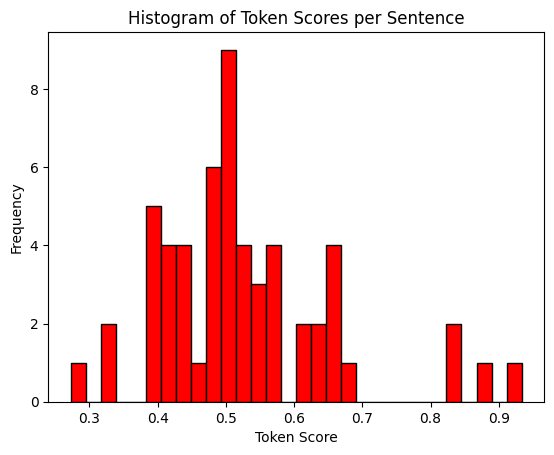

In [208]:
plt.hist(token_scores, bins=30, color='red', edgecolor='black')
plt.xlabel('Token Score')
plt.ylabel('Frequency')
plt.title('Histogram of Token Scores per Sentence')
plt.show()

### Question 7:

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

### Solution 7:

#### Number of lemmas and the sentence they're in.

In [209]:
lemma_scores = []
for sentence in sentences:
  lemma_scores.append(score_sentence_by_lemma(sentence, interesting_lemmas))

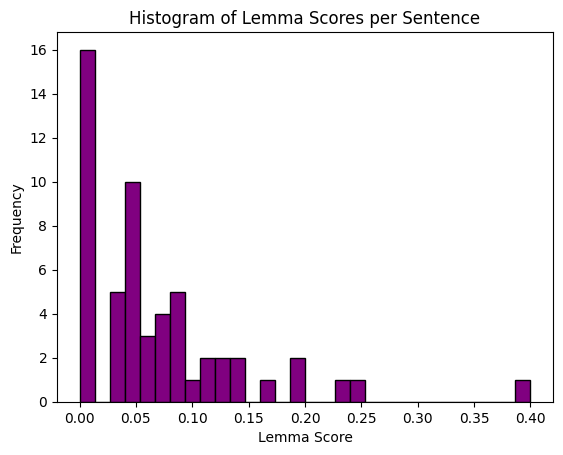

In [210]:
plt.hist(lemma_scores, bins=30, color='purple', edgecolor='black')
plt.xlabel('Lemma Score')
plt.ylabel('Frequency')
plt.title('Histogram of Lemma Scores per Sentence')
plt.show()

### Question 8:

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

Every word that wasn't a noun would be ommitted and the code below shows the changes to be made. 

### Solution 8:

In [211]:
nouns = [token.text for token in doc if token.pos_ == 'NOUN']
print(nouns)

lemma_nouns = [token.lemma_.lower() for token in doc if token.pos_ == 'NOUN']
print(lemma_nouns)

['technology', 'headlights', 'thing', 'Engines', 'fuel', 'efficiency', 'switch', 'power', 'front', 'mind', 'thousands', 'engineers', 'world', 'state', 'art', 'lighting', 'day', 'day', 'beam', 'headlights', 'way', 'designs', 'regulations', 'bulbs', 'halogens', 'LEDs', 'technology', 'scene', 'lasers', 'prototype', 'laser', 'assemblies', 'testing', 'image', 'mind', 'phrase', 'laser', 'headlights', 'laser', 'beams', 'front', 'automobile', 'beams', 'light', 'illumination', 'spot', 'distance', 'eyes', 'laser', 'headlights', 'way', 'laser', 'headlights', 'state', 'laser', 'diodes', 'headlight', 'lasers', 'phosphor', 'LEDs', 'light', 'reflectors', 'headlights', 'road', 'Laser', 'headlights', 'way', 'benefits', 'energy', 'LEDs', 'amount', 'light', 'space', 'i8', 'vehicles', 'laser', 'technology', 'headlights', 'nascent', 'technology', 'vehicles', 'technology', 'partnership', 'lighting', 'experts', 'practice', 'beam', 'lamp', 'laser', 'spot', 'beams', 'illumination', 'meters', 'vehicle', 'beams'